# **Covid-19 Classification using CNN**

In [ ]:
import numpy as np 
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
import os
import cv2
import matplotlib.pyplot as plt
import PIL.Image as img
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# Set path for train and test directory
train_path = '/content/drive/MyDrive/Sem_2/ADBMS/Assignment/Assignment_2/Databases/Covid19-dataset/train'
test_path = '/content/drive/MyDrive/Sem_2/ADBMS/Assignment/Assignment_2/Databases/Covid19-dataset/test'

In [ ]:
from matplotlib.image import imread
dim1 = []
dim2 = []
for image_filename in os.listdir(test_path+'/Covid'):
    
    img = imread(test_path+'/Covid'+'/'+image_filename)
    d1,d2 = img.shape[0],img.shape[1]
    dim1.append(d1)
    dim2.append(d2)
np.mean(dim1),np.mean(dim2)

(754.5769230769231, 814.3846153846154)

In [ ]:
from matplotlib.image import imread
dim1 = []
dim2 = []
for image_filename in os.listdir(test_path+'/Normal'):
    
    img = imread(test_path+'/Normal'+'/'+image_filename)
    d1,d2 = img.shape[0],img.shape[1]
    dim1.append(d1)
    dim2.append(d2)
np.mean(dim1),np.mean(dim2)

(1531.15, 1891.7)

In [ ]:
from matplotlib.image import imread
dim1 = []
dim2 = []
for image_filename in os.listdir(test_path+'/Viral Pneumonia'):
    
    img = imread(test_path+'/Viral Pneumonia'+'/'+image_filename)
    d1,d2 = img.shape[0],img.shape[1]
    dim1.append(d1)
    dim2.append(d2)
np.mean(dim1),np.mean(dim2)

(860.0, 1238.7)

In [ ]:
(754.5769230769231+1531.15+860.0)/3 , (814.3846153846154+1891.7+1238.7)/3

(1048.575641025641, 1314.9282051282053)

In [ ]:
image_shape = (514,514,3)

In [ ]:
image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Shift the pic height by a max of 5%
                               rescale=1/255, # Rescale the image by normalzing it.
                               #shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               #zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allo horizontal flipping
                               #fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

In [ ]:
image_gen.flow_from_directory(train_path)

Found 251 images belonging to 3 classes.


In [ ]:
image_gen.flow_from_directory(test_path)

Found 66 images belonging to 3 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Initialising the CNN
classifier = Sequential()

#1 - Convolution
classifier.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

#2 - Pooling
# Hidden Layer 1
classifier.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Adding a second convolution layer
# relu turns negative values in images to 0
classifier.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

classifier.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

classifier.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

#3 - Flattening
# converts the matrix in a singe array
classifier.add(Flatten())


classifier.add(Dense(128))
classifier.add(Activation('relu'))


# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
classifier.add(Dropout(0.5))

#4 - Full Connection
# 128 is the final layer of outputs & from that 1 will be considered.
# Last layer, remember its binary so we use sigmoid
classifier.add(Dense(3))
classifier.add(Activation('softmax'))

classifier.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 512, 512, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 256, 256, 32)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 254, 254, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 127, 127, 64)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 125, 125, 64)      36928     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 62, 62, 64)      

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [ ]:
# Set batch size to 16
batch_size = 16

In [ ]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               color_mode = 'rgb',
                                               class_mode='sparse')

Found 251 images belonging to 3 classes.


In [ ]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],                                               
                                               batch_size=batch_size,
                                               color_mode = 'rgb',
                                               class_mode='sparse',shuffle=False)

Found 66 images belonging to 3 classes.


In [ ]:
results = classifier.fit_generator(train_image_gen,epochs=20,
                              validation_data=test_image_gen,
                             callbacks=[early_stop])

Epoch 1/20
16/16 [==============================] - 230s 13s/step - loss: 1.1178 - accuracy: 0.3984 - val_loss: 1.0558 - val_accuracy: 0.4394
Epoch 2/20
16/16 [==============================] - 37s 2s/step - loss: 0.8159 - accuracy: 0.6375 - val_loss: 0.9577 - val_accuracy: 0.6364
Epoch 3/20
16/16 [==============================] - 31s 2s/step - loss: 0.7587 - accuracy: 0.6693 - val_loss: 0.7011 - val_accuracy: 0.7424
Epoch 4/20
16/16 [==============================] - 34s 2s/step - loss: 0.6097 - accuracy: 0.7809 - val_loss: 0.8498 - val_accuracy: 0.7424
Epoch 5/20
16/16 [==============================] - 31s 2s/step - loss: 0.5699 - accuracy: 0.7570 - val_loss: 0.6477 - val_accuracy: 0.7273
Epoch 6/20
16/16 [==============================] - 32s 2s/step - loss: 0.5211 - accuracy: 0.8287 - val_loss: 0.6033 - val_accuracy: 0.7424
Epoch 7/20
16/16 [==============================] - 34s 2s/step - loss: 0.5040 - accuracy: 0.8367 - val_loss: 0.5377 - val_accuracy: 0.8030
Epoch 8/20
16/16 [

In [ ]:
classifier.get_weights()

<Axes: >

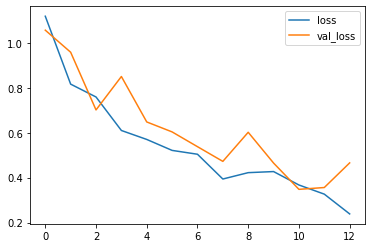

In [ ]:
# Loss
losses = pd.DataFrame(classifier.history.history)
losses[['loss','val_loss']].plot()

In [ ]:
classifier.metrics_names

['loss', 'accuracy']

In [ ]:
classifier.evaluate_generator(test_image_gen)

[0.6274623870849609, 0.7878788113594055]

In [ ]:
# Predict
pred_probabilities = classifier.predict_generator(test_image_gen)
pred = np.argmax(pred_probabilities>0.5,axis=1)
pred

array([0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2])

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(test_image_gen.classes,pred))

              precision    recall  f1-score   support

           0       1.00      0.69      0.82        26
           1       0.61      0.95      0.75        20
           2       0.94      0.80      0.86        20

    accuracy                           0.80        66
   macro avg       0.85      0.81      0.81        66
weighted avg       0.86      0.80      0.81        66



In [ ]:
# Save model
from tensorflow.keras.models import load_model
classifier.save('/content/drive/MyDrive/Sem_2/ADBMS/Assignment/Assignment_2/covid_19_detector.h5')

In [ ]:
from tensorflow.keras.models import load_model
loaded_classifier = load_model('/content/drive/MyDrive/Sem_2/ADBMS/Assignment/Assignment_2/covid_19_detector.h5')

In [ ]:
test_input_path = '/content/drive/MyDrive/Sem_2/ADBMS/Assignment/Assignment_2/Databases/Covid19-dataset/test_input'

In [ ]:
test_input_image_gen = image_gen.flow_from_directory(test_input_path,
                                               target_size=image_shape[:2],                                               
                                               batch_size=batch_size,
                                               color_mode = 'rgb',
                                               class_mode='sparse',shuffle=False)

Found 6 images belonging to 3 classes.


In [ ]:
test_image_gen.class_indices

{'Covid': 0, 'Normal': 1, 'Viral Pneumonia': 2}

In [ ]:
prob = loaded_classifier.predict_generator(test_input_image_gen)
prob_final = np.argmax(prob>0.5,axis=1)
prob_final

In [ ]:
print(classification_report(test_input_image_gen.classes,prob_final))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.67      1.00      0.80         2
           2       1.00      1.00      1.00         2

    accuracy                           0.83         6
   macro avg       0.89      0.83      0.82         6
weighted avg       0.89      0.83      0.82         6

